//TODO fix common graph so that they have a unified time frame from min to max

# WATER LOSS 

## Familiarization with the data

Imports and the libraries I will be using and data reading:

`“timeStamp”`: is the date time of the mesure.

`“Idflowmeter”`: is the ID of the meter The peculiar series of water measures for two sensor IDs are yet to be explained by Braila.

`“Tot1”`: is the water flow in m3 - Flow in the direction of consumers(households). Can we viewed as flow that goes into the braila district  

`“Tot2”`: is the water flow in m3 - Flow that goes out the braila district.

`“Analog2”`: is the water pressure of the measure point. The unit is probably Pascal, however not yet confirmed by Braila.

In [1]:
import math
import pandas as pandas
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

data = pandas.read_json("../data/water_loss_data_set_1.json")

Preparing data:
1. **Removed values that make no sense -> "0000-00-00 00:00:00", "2000-01-01 00:00:00"**
2. **Removed rows without tot1 data or without analog2 data**
3. **Formated column timeStamp to dateTime format**
4. **Floored minutes to the nearest hour**
5. **Divided data depending on the id of the measuring station**
6. **Prepared the data for plotting**

In [2]:
# removing false values
data = data[(data.timeStamp != "0000-00-00 00:00:00" ) & (data.timeStamp != "2000-01-01 00:00:00")]

"""
Missing data in columns: 
tot1: 5086 
tot2: 100635 
analog2: 25

Removing data which is zero, be careful for 'analog2' only 25 values have zero. 
This could be values when some work was done on the pipes so the unhooked them -> pressure 0 ?
""" 
data = data[(data.tot1 != 0 ) & (data.analog2 != 0)]
data["timeStamp"] = pandas.to_datetime(data["timeStamp"], format="%Y-%m-%d %H:%M")

Diving data....

In [3]:
# COMMENT THIS IF YOU WANT MORE SPEED
data_with_minutes = data.copy(deep=True)
data_with_minutes["timeStamp"] = data_with_minutes["timeStamp"].dt.strftime("%Y-%m-%d %H:%M")

# flooring to the nearest hour and grouping by hour, and removing seconds and minutes
data["timeStamp"] = data["timeStamp"].dt.floor('h')
data["timeStamp"] = data["timeStamp"].dt.strftime("%Y-%m-%d %H:%M")
data["timeStamp"] = pandas.to_datetime(data["timeStamp"], format="%Y-%m-%d %H:%M")
data.sort_values("timeStamp")

# GET MIN AND MAX DATE
MEASURED_MIN_DATE = data.nsmallest(1, "timeStamp")["timeStamp"].iloc[0]
MEASURED_MAX_DATE = data.nlargest(1, "timeStamp")["timeStamp"].iloc[0]
print("First date:", type(MEASURED_MIN_DATE), "\nLast date:", MEASURED_MAX_DATE)

# splitting the data by measuring station
data_249 = data[data['idflowmeter'] == "MAG8000_024905H318"]
data_248 = data[data['idflowmeter'] == "MAG8000_024805H318"]
data_with_minutes

First date: <class 'pandas._libs.tslibs.timestamps.Timestamp'> 
Last date: 2020-04-01 14:00:00


,timeStamp,idflowmeter,tot1,tot2,analog2
105,2018-11-23 08:55,MAG8000_024905H318,0.43,0.00,1.11
106,2018-11-23 08:56,MAG8000_024905H318,0.89,0.00,1.11
107,2018-11-23 08:57,MAG8000_024905H318,1.38,0.00,1.11
108,2018-11-23 08:58,MAG8000_024905H318,1.90,0.00,1.11
109,2018-11-23 08:59,MAG8000_024905H318,2.45,0.00,1.11
...,...,...,...,...,...
1395740,2020-04-01 14:05,MAG8000_024805H318,977428.25,-4713.21,1.54
1395741,2020-04-01 14:06,MAG8000_024805H318,977428.88,-4713.21,1.54
1395742,2020-04-01 14:07,MAG8000_024805H318,977429.50,-4713.21,1.54
1395743,2020-04-01 14:08,MAG8000_024805H318,977430.12,-4713.21,1.54


Generating a range of dates for common plotting. Value of last date is increased for 15 days and first is decreased for 15 days.

In [4]:
date_range_seconds = pandas.date_range(start=(MEASURED_MIN_DATE - pandas.Timedelta(30, unit='D')), 
                                       end=(MEASURED_MAX_DATE + pandas.Timedelta(30, unit='D')), freq="M")
date_range = []

for date in date_range_seconds:
    without_second = date.strftime('%Y-%m-%d %H:%M')
    date_range.append(without_second)
    
date_range

['2018-10-31 08:00',
 '2018-11-30 08:00',
 '2018-12-31 08:00',
 '2019-01-31 08:00',
 '2019-02-28 08:00',
 '2019-03-31 08:00',
 '2019-04-30 08:00',
 '2019-05-31 08:00',
 '2019-06-30 08:00',
 '2019-07-31 08:00',
 '2019-08-31 08:00',
 '2019-09-30 08:00',
 '2019-10-31 08:00',
 '2019-11-30 08:00',
 '2019-12-31 08:00',
 '2020-01-31 08:00',
 '2020-02-29 08:00',
 '2020-03-31 08:00',
 '2020-04-30 08:00']

Removed this timestamps from data  
`['0000-00-00 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00']`

In [5]:
data_249.sort_values("timeStamp")
data_248.sort_values("timeStamp")
data_249_by_hour = data_249.groupby("timeStamp").mean()
data_248_by_hour = data_248.groupby("timeStamp").mean()


data_249_by_hour.index = data_249_by_hour.index.strftime("%Y-%m-%d %H:%M")
data_248_by_hour.index = data_248_by_hour.index.strftime("%Y-%m-%d %H:%M")

data_249_by_hour

,tot1,tot2,analog2
timeStamp,,,
2018-11-23 08:00,1.410000,0.00,1.110000
2018-11-23 09:00,30.987273,0.00,1.103409
2018-11-23 10:00,87.809457,0.00,1.099022
2018-11-23 11:00,182.008000,0.00,1.101000
2018-11-23 12:00,278.252500,0.00,0.960333
...,...,...,...
2020-04-01 04:00,796739.947500,-293.97,0.826000
2020-04-01 05:00,796816.443333,-293.97,0.824667
2020-04-01 06:00,796915.016000,-293.97,0.817167


In [6]:
data_248_by_hour

,tot1,tot2,analog2
timeStamp,,,
2018-12-11 12:00,161.873400,0.00,0.819200
2018-12-11 13:00,264.282667,0.00,0.820333
2018-12-11 14:00,371.478000,0.00,0.818333
2018-12-11 15:00,487.519333,0.00,0.813167
2018-12-11 16:00,601.331833,0.00,0.810833
...,...,...,...
2020-04-01 10:00,977299.898333,-4713.21,1.527333
2020-04-01 11:00,977333.727167,-4713.21,1.528500
2020-04-01 12:00,977369.184833,-4713.21,1.530500


In [7]:
timestamp_data_249 = data_249_by_hour.index.tolist()
timestamp_data_249 = [str(i) for i in timestamp_data_249]

timestamp_data_248 = data_248_by_hour.index.tolist()
timestamp_data_248 = [str(i) for i in timestamp_data_248]

y_axis_data = data.groupby("timeStamp").mean()[["analog2"]].to_numpy()
y_axis_data_249 = data_249_by_hour[["analog2"]].to_numpy()
y_axis_data_248 = data_248_by_hour[["analog2"]].to_numpy()
y_axis_data

array([[1.11      ],
       [1.10340909],
       [1.09902174],
       ...,
       [1.5305    ],
       [1.53933333],
       [1.539     ]])

Max date: `2020-04-01 14:09:00`  
Min date: `0000-00-00 00:00:00` 
Median date: `2019-08-02 02:27:00` 

False values:  `[['0000-00-00 00:00:00' -1.0]
 ['2000-01-01 00:00:00' 0.0]
 ['2000-01-01 00:00:00' 0.0]
 ['2000-01-01 00:00:00' 0.0]
 ['2000-01-01 00:00:00' 0.0]]`

Checking which data is missing.   
"tot2" attribute contains negative values mostly negative values!! Other do not...

In [8]:
# data_248_by_hour.to_csv("id_248.csv", sep=';', encoding='utf-8')
# data_249_by_hour.to_csv("id_249.csv", sep=';', encoding='utf-8')

"""
DATA_SIZE = 1390649 
len_tot1 = len(data[(data['tot1'] != 0)])
len_tot2 = len(data[(data['tot2'] != 0)])
len_analog = len(data[(data['analog2'] != 0)])

print("Missing data in columns: ")
print("tot1:", (DATA_SIZE - len_tot1), "\ntot2:", (DATA_SIZE - len_tot2), "\nanalog2:", (DATA_SIZE- len_analog))
""";

In [9]:
# fig, ax = plt.subplots(figsize=(18, 12), dpi= 100)

# ax.plot(timestamp_data_249, y_axis_data_249, color="red")
# ax.plot(timestamp_data_248, y_axis_data_248, color="blue")
# ax.set_xticks([])

# plt.show()

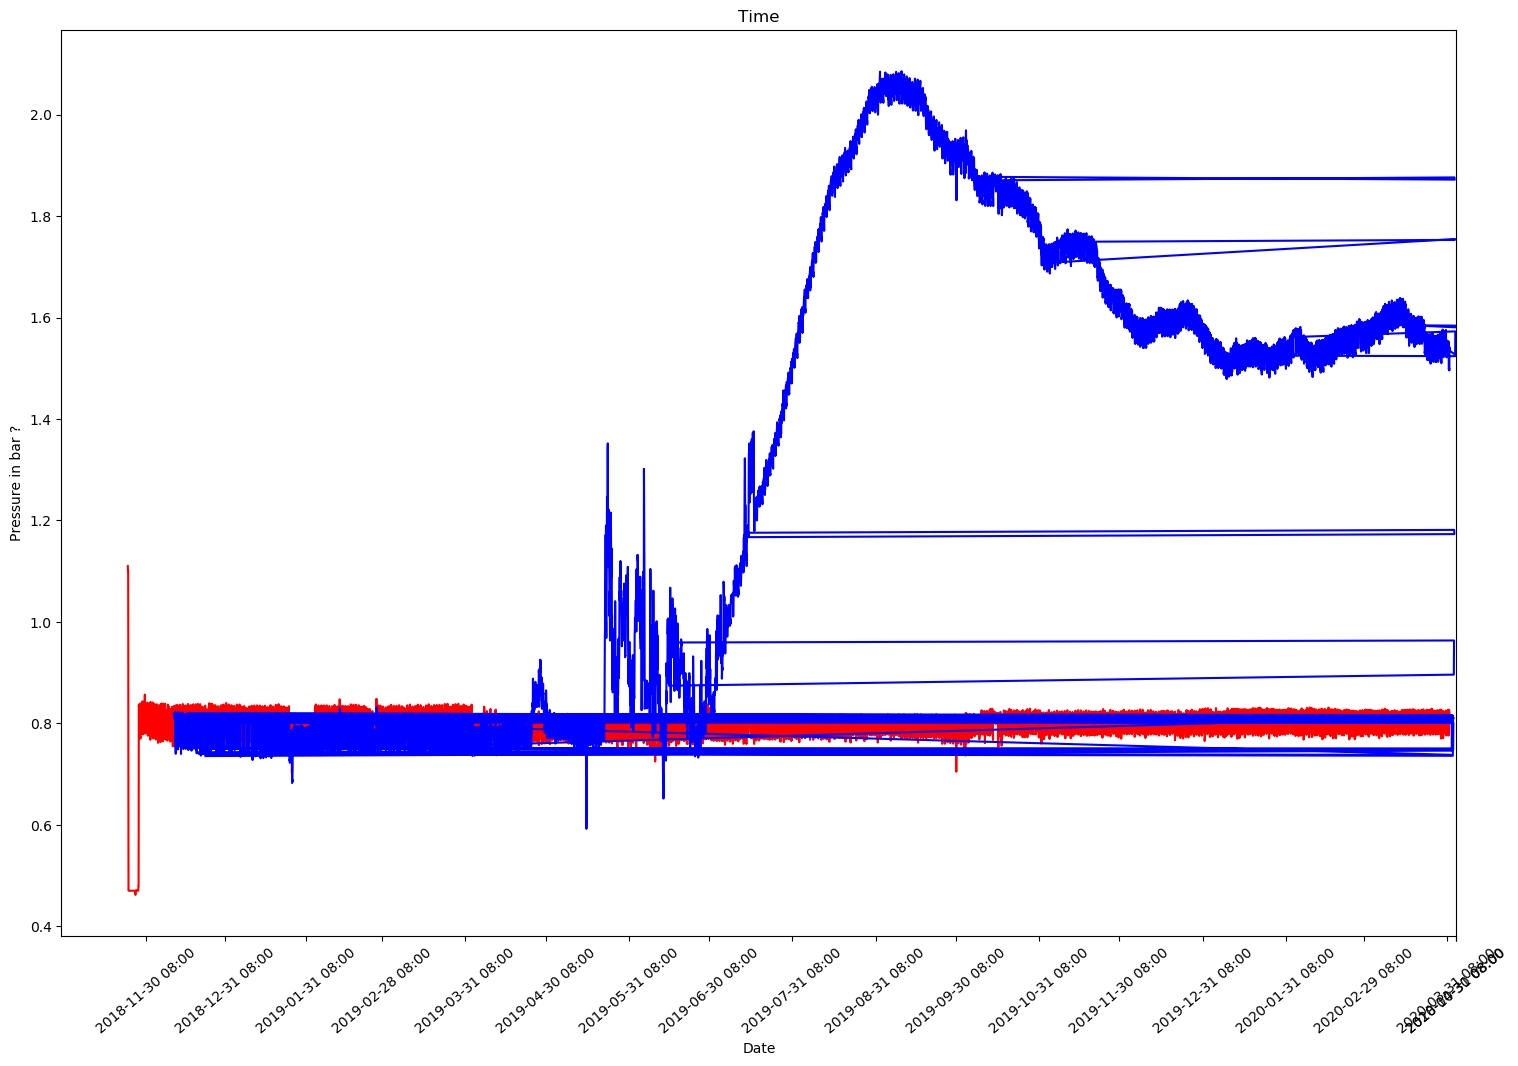

In [10]:
# version 2
fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')


plt.plot(timestamp_data_249, y_axis_data_249, color="red")
plt.plot(timestamp_data_248, y_axis_data_248, color="blue")
# plt.plot(timestamp_data_249[:1000], y_axis_data_249[:1000], color="red")
# plt.plot(timestamp_data_248[:1000], y_axis_data_248[:1000], color="blue")

plt.ylabel('Pressure in bar ?')
plt.xlabel('Date')
plt.xlim(right=date_range[len(date_range)-1]) 
plt.xticks(date_range, rotation=40)
plt.rc('xtick',labelsize=8)
plt.title('Time')
#plt.margins(0.01, 0.1)
#plt.savefig('test.png')
plt.show()

In [11]:
"""fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')
plt.plot(timestamp_data_249, y_axis_data_249, color="red")
plt.plot(timestamp_data_248, y_axis_data_248, color="blue")

plt.ylabel('Pressure in bar ?')
plt.xlabel('Date')
plt.xticks([i for i in range(0,len(y_axis_data), 1000)], rotation=40)
plt.rc('xtick',labelsize=8)
plt.title('Time')
#plt.savefig('test.png')
plt.show()""";

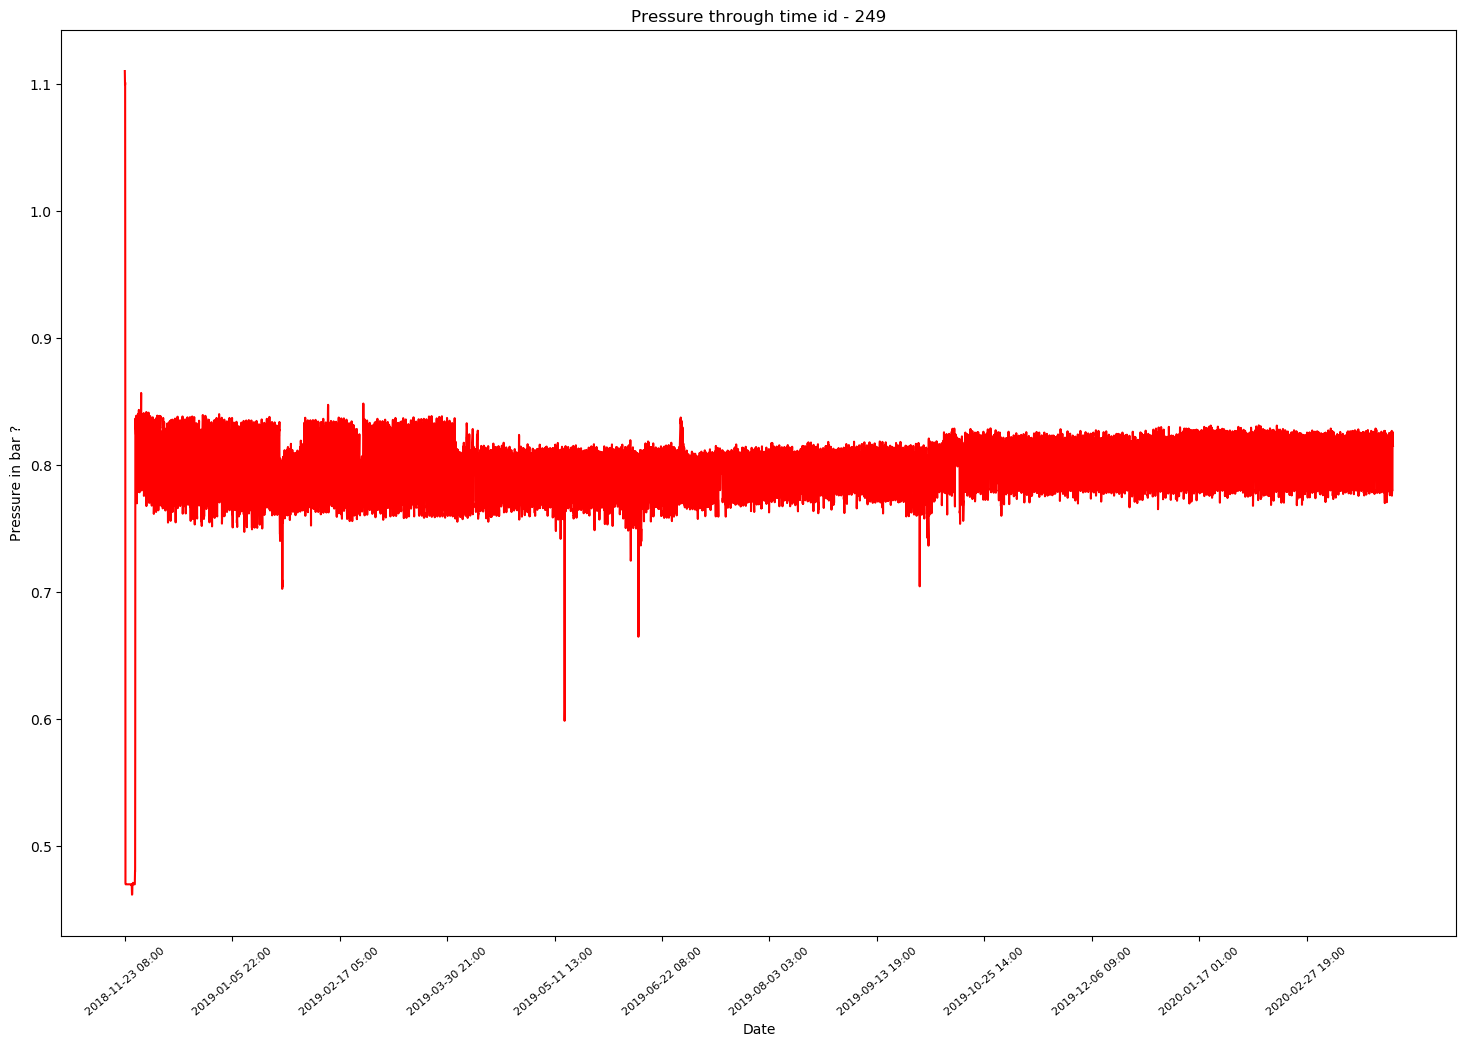

In [12]:
fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')
plt.plot(timestamp_data_249, y_axis_data_249, color="red")

plt.ylabel('Pressure in bar ?')
plt.xlabel('Date')
plt.xticks([i for i in range(0,len(y_axis_data), 1000)], rotation=40)
plt.rc('xtick',labelsize=14)
plt.title('Pressure through time id - 249')
# plt.savefig('red_id.png')
plt.show()

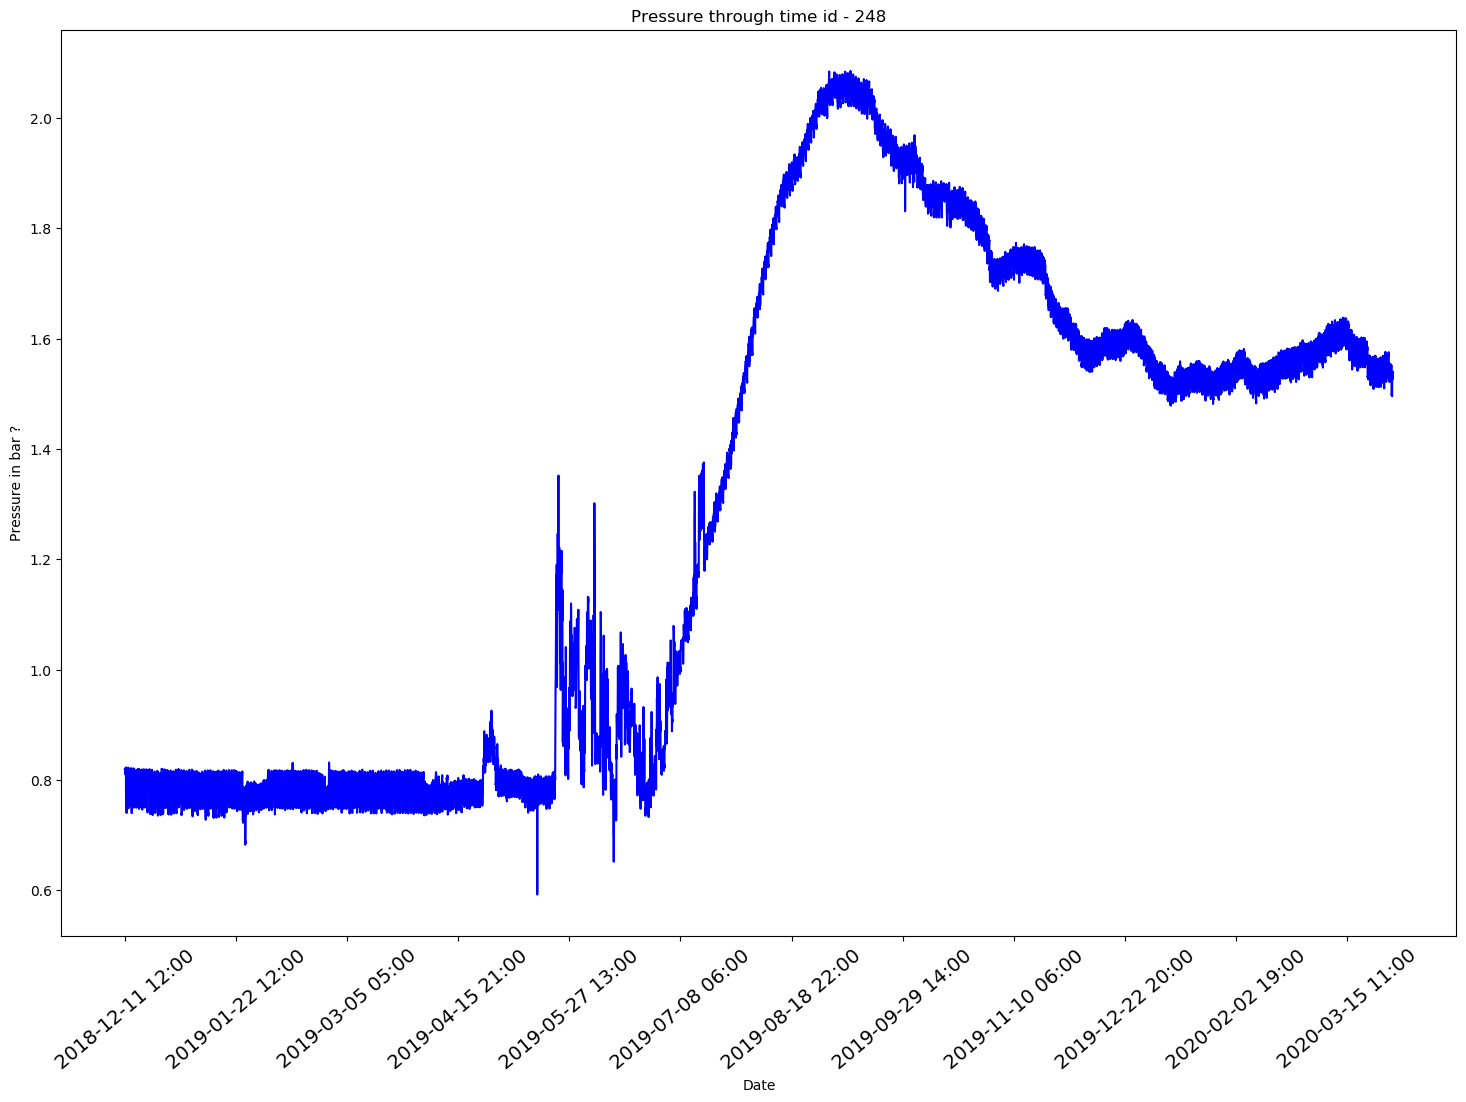

In [13]:
fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')
plt.plot(timestamp_data_248, y_axis_data_248, color="blue")

plt.ylabel('Pressure in bar ?')
plt.xlabel('Date')
plt.xticks([i for i in range(0,len(y_axis_data), 1000)], rotation=40)
plt.rc('xtick',labelsize=14)
plt.title('Pressure through time id - 248')
# plt.savefig('blue_id.png')
plt.show()

## Water flow in m3
Looking at tot1 and tot2 data attributes

In [14]:
y_axis_tot1_249 = data_249_by_hour[["tot1"]].to_numpy()
y_axis_tot1_248 = data_248_by_hour[["tot1"]].to_numpy()

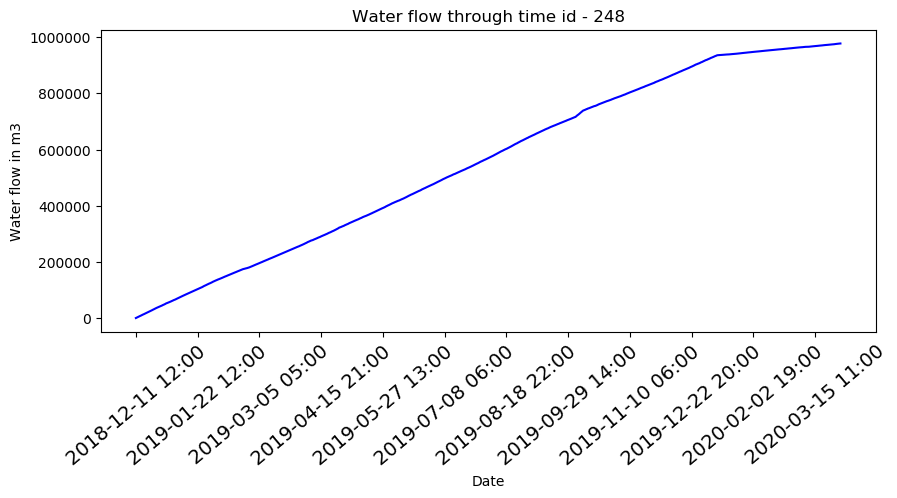

In [15]:
def draw_x_y__water_graph(timestamp_x, waterflow_y, id_m):
    g_color = "blue"
    if id_m == 249 or id_m == "249":
        g_color = "red"
        
    fig = plt.figure(figsize=(10, 4), dpi= 100, facecolor='w')
    plt.plot(timestamp_x, waterflow_y, color = g_color)
    plt.xticks([i for i in range(0,len(y_axis_data), 1000)], rotation=40)
    plt.rc('xtick',labelsize=8)

    plt.ylabel('Water flow in m3')
    plt.xlabel('Date')
    plt.title('Water flow through time id - ' + str(id_m))
    plt.show()
    
draw_x_y__water_graph(timestamp_data_248, y_axis_tot1_248, 248)

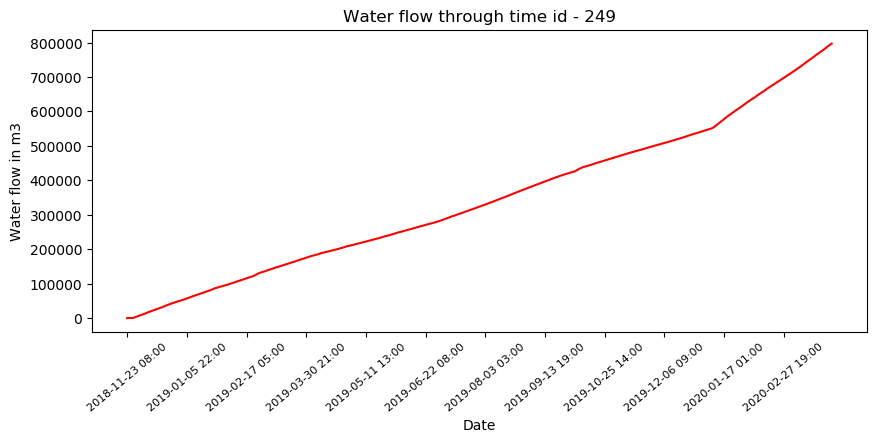

In [16]:
draw_x_y__water_graph(timestamp_data_249, y_axis_tot1_249, 249)

In [17]:
y_axis_tot2_249 = data_249_by_hour[["tot2"]].to_numpy()
y_axis_tot2_248 = data_248_by_hour[["tot2"]].to_numpy()

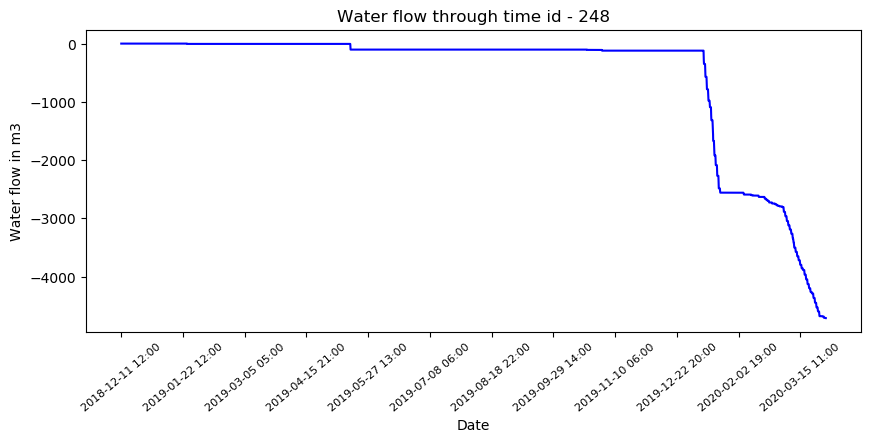

In [18]:
draw_x_y__water_graph(timestamp_data_248, y_axis_tot2_248, 248)

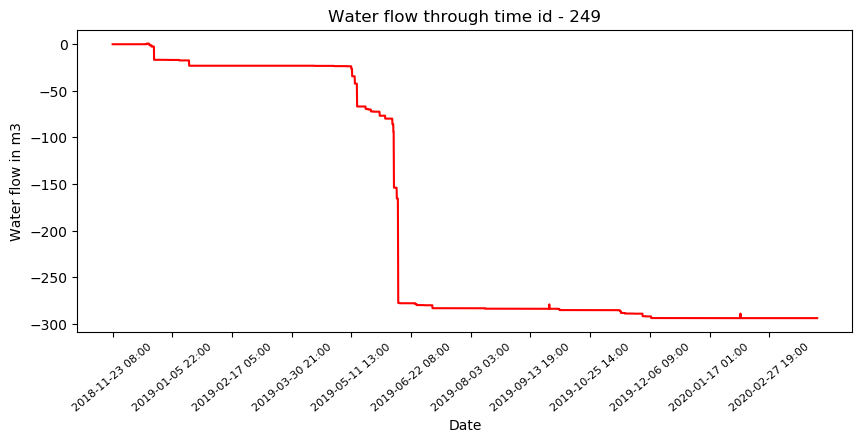

In [19]:
draw_x_y__water_graph(timestamp_data_249, y_axis_tot2_249, 249)

# Graph to check water pressure in a given timeframe

You have to choose two dates and the graph will be drawn between them. You must also choose the station for which you want to view the data.

In [20]:
START_TIME = "2018-12-22 12:00"  
END_TIME = "2018-12-25 12:00"  
STATION = 248  

In [21]:
def generate_timestamp_yaxis_array(start_time, end_time, station):
    choosen_data = data_248_by_hour
    
    if station == 249:
        choosen_data = data_249_by_hour
        
    choosen_data.index = pandas.to_datetime(choosen_data.index, format="%Y-%m-%d %H:%M")

    start_time = pandas.to_datetime(start_time, format="%Y-%m-%d %H:%M")
    end_time   = pandas.to_datetime(end_time, format="%Y-%m-%d %H:%M")
    choosen_data = choosen_data.loc[(choosen_data.index >= start_time) & (choosen_data.index <= end_time)]
    
    timestamp = choosen_data.index.tolist()
    timestamp = [str(i) for i in timestamp]
    
    y_axis = choosen_data[["analog2"]].to_numpy()
    
    fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')
    plt.plot(timestamp, y_axis, color="blue")

    plt.ylabel('Pressure in bar ?')
    plt.xlabel('Date')
    plt.xticks([i for i in range(0,len(y_axis), round(len(y_axis)/12))], rotation=40)
    plt.rc('xtick',labelsize=16)
    plt.title('Time')
    # plt.savefig('blue_id.png')
    plt.show()

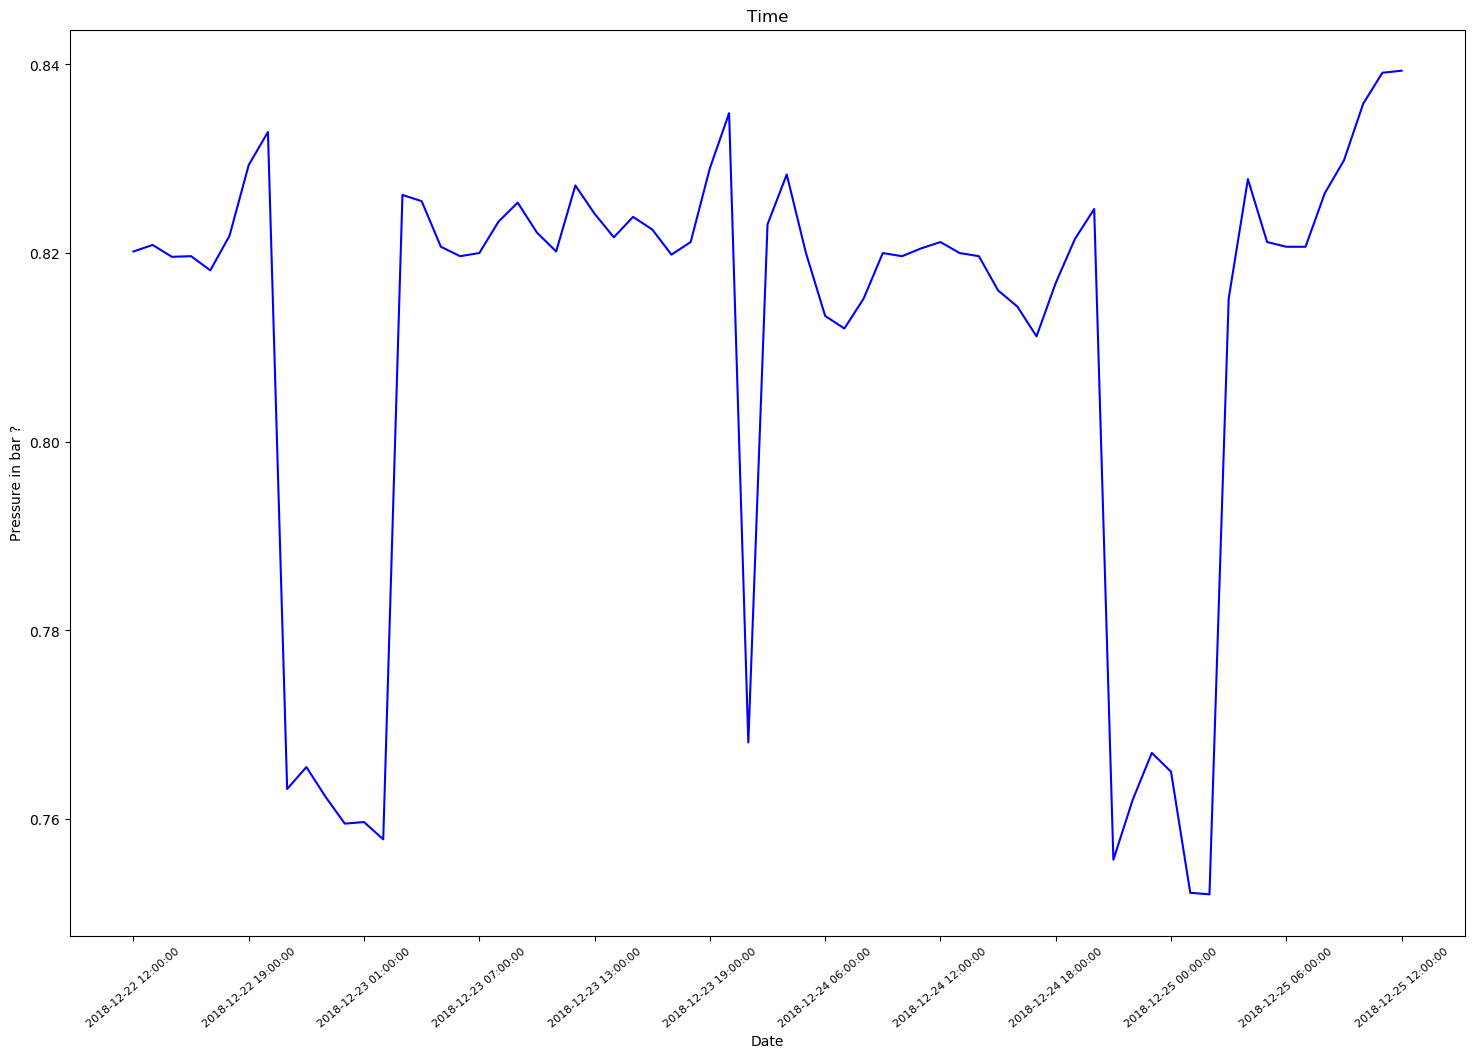

In [22]:
generate_timestamp_yaxis_array("2018-12-22 12:00", "2018-12-25 12:00", 249)

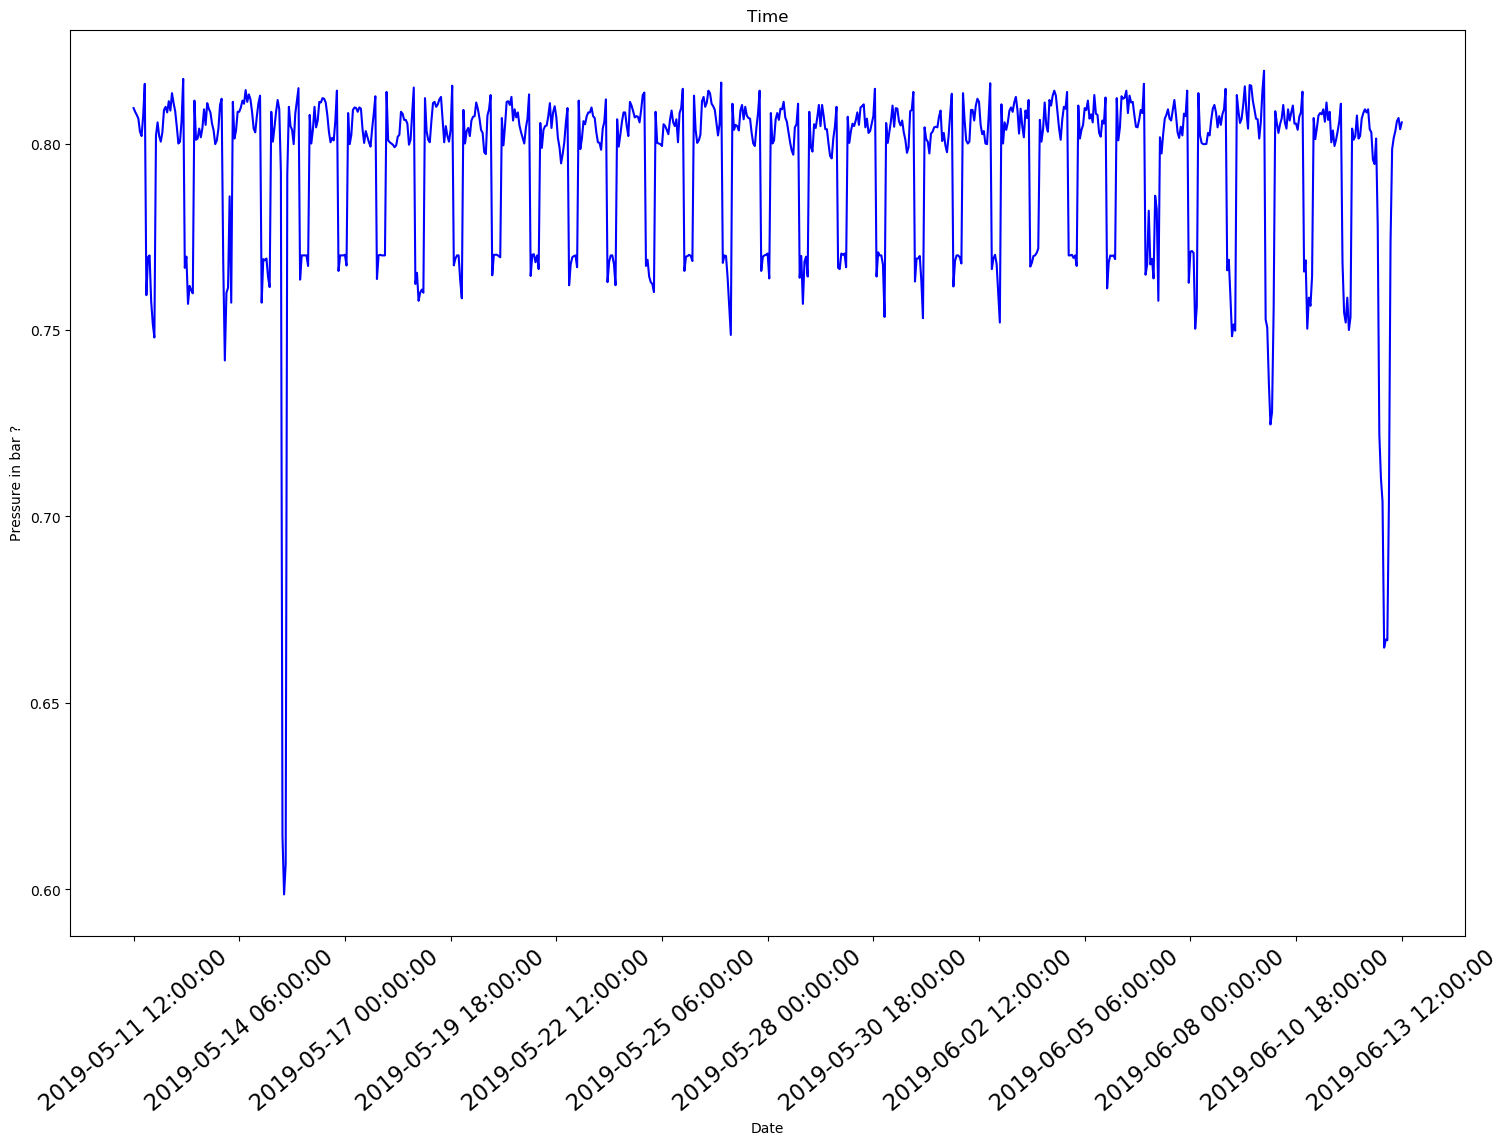

In [23]:
generate_timestamp_yaxis_array("2019-05-11 12:00:00", "2019-06-13 12:00:00", 249)

### Daily view in minutes
Division again by id of the measuring device.

In [24]:
data_minutes_249 = data_with_minutes[data_with_minutes['idflowmeter'] == "MAG8000_024905H318"]
data_minutes_248 = data_with_minutes[data_with_minutes['idflowmeter'] == "MAG8000_024805H318"]

data_minutes_249 = data_minutes_249.groupby("timeStamp").mean()
data_minutes_248 = data_minutes_248.groupby("timeStamp").mean()

# Saving data to process in another notebook
data_minutes_248.to_json("../data/device_id_248.json")
data_minutes_249.to_json("../data/device_id_249.json")

In [29]:
HOUR_ARRAY = [(f"{i:02d}" + ":00") for i in range(0,25)]

def generate_day_view(year_month_day, station):
    choosen_data = data_minutes_248
    
    if station == 249:
        choosen_data = data_minutes_249
    if len(choosen_data.index) < 1:
        raise Exception("No data for this date")
    
    start_day = year_month_day.strip() + " 00:00"
    end_day = year_month_day.strip() + " 23:59"
    choosen_data = choosen_data.loc[(choosen_data.index >= start_day) & (choosen_data.index <= end_day)]
    
    timestamp = choosen_data.index.tolist()
    timestamp = [str(i).replace(year_month_day, "").strip() for i in timestamp]
    
    y_axis = choosen_data[["analog2"]].to_numpy()
    
    fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')
    plt.plot(timestamp, y_axis, color="blue")
    plt.xticks(HOUR_ARRAY, rotation=40)
    plt.rc('xtick',labelsize=16)
    plt.margins(0, 0.1)
    
    plt.ylabel('Pressure in bar ?')
    plt.xlabel('Date')
    plt.title('Time')
    # plt.savefig('blue_id.png')
    plt.show()
    

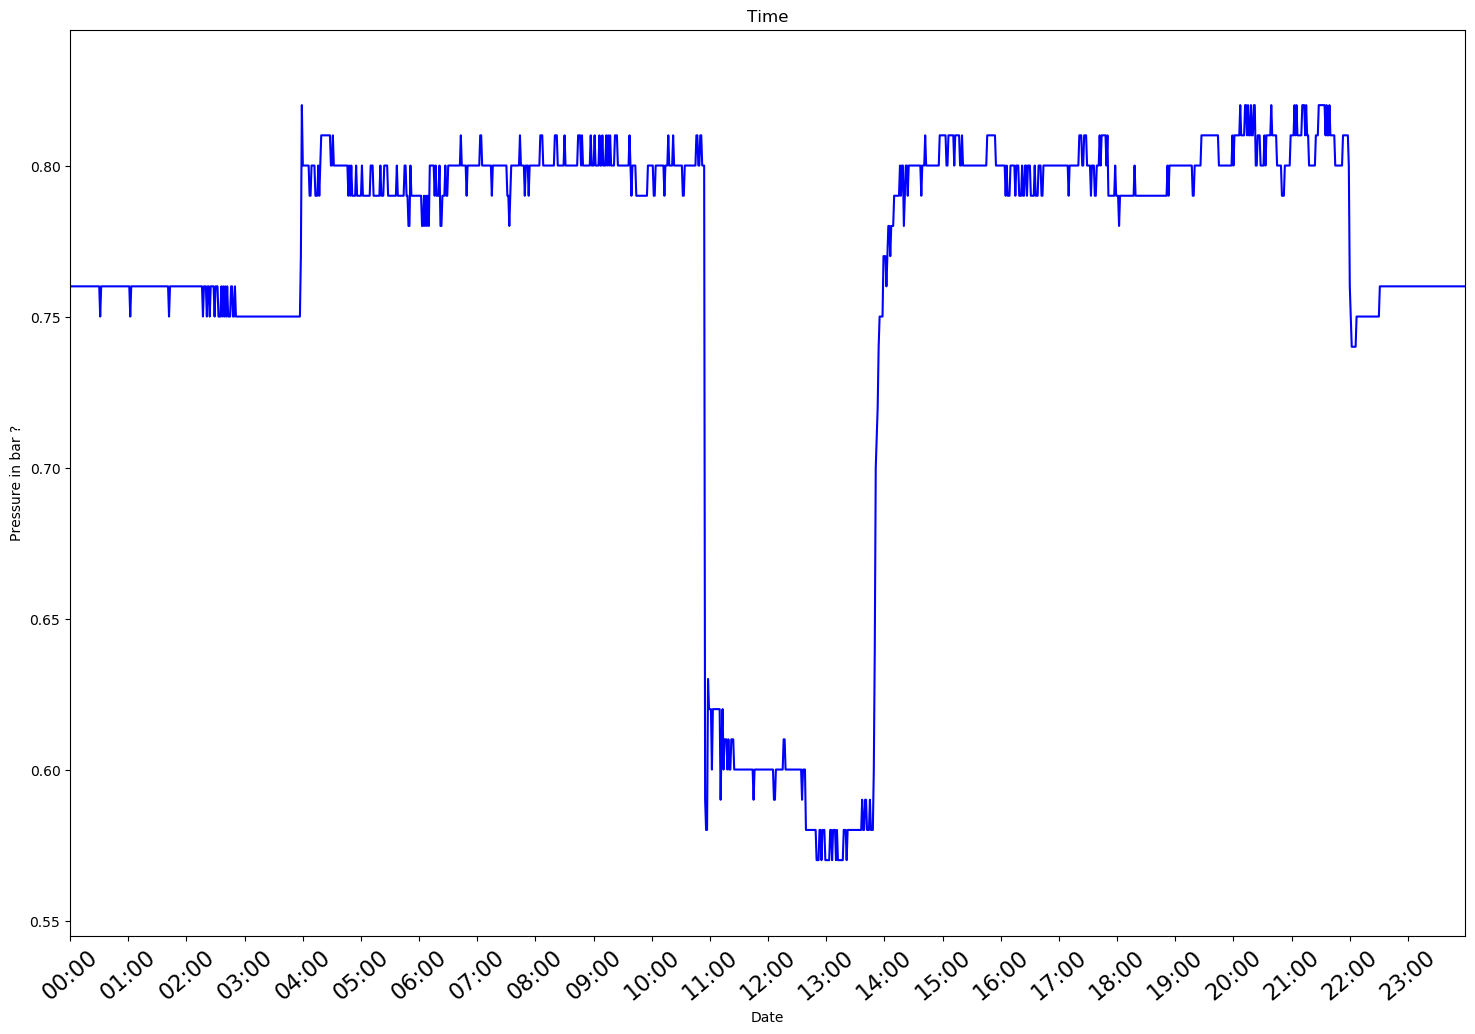

In [30]:
generate_day_view("2019-05-15", 248)

## Plotting all data on the same graph to see correlation

In [31]:
# data_minutes_249 = data_with_minutes[data_with_minutes['idflowmeter'] == "MAG8000_024905H318"]
# data_minutes_248 = data_with_minutes[data_with_minutes['idflowmeter'] == "MAG8000_024805H318"]

normalised_data_248 = ((data_minutes_248 - data_minutes_248.min()) / (data_minutes_248.max() - data_minutes_248.min()))
normalised_data_249 = ((data_minutes_249 - data_minutes_249.min()) / (data_minutes_249.max() - data_minutes_249.min()))
normalised_data_249

,tot1,tot2,analog2
timeStamp,,,
2018-11-23 08:55,0.000000e+00,0.996644,0.984848
2018-11-23 08:56,5.770197e-07,0.996644,0.984848
2018-11-23 08:57,1.191671e-06,0.996644,0.984848
2018-11-23 08:58,1.843954e-06,0.996644,0.984848
2018-11-23 08:59,2.533869e-06,0.996644,0.984848
...,...,...,...
2020-04-01 08:35,9.999853e-01,0.000000,0.545455
2020-04-01 08:36,9.999903e-01,0.000000,0.530303
2020-04-01 08:37,9.999935e-01,0.000000,0.530303


In [40]:
normalized_data = normalised_data_249.loc[(normalised_data_249.index >= "2019-05-11 12:00:00") 
                                          & (normalised_data_249.index <= "2019-05-12 12:00:00")]
normalized_data

,tot1,tot2,analog2
timeStamp,,,
2019-05-11 12:01,0.278835,0.907276,0.530303
2019-05-11 12:02,0.278837,0.907276,0.530303
2019-05-11 12:03,0.278838,0.907276,0.530303
2019-05-11 12:04,0.278839,0.907276,0.515152
2019-05-11 12:05,0.278840,0.907276,0.530303
...,...,...,...
2019-05-12 11:56,0.280199,0.880085,0.530303
2019-05-12 11:57,0.280200,0.880085,0.515152
2019-05-12 11:58,0.280201,0.880085,0.530303


In [51]:
def get_data_matrix(data):
    time_data = normalized_data.index.to_numpy()
    # tot1, tot2, analog2
    return time_data, data.to_numpy()

time_x, data_y = get_data_matrix(normalized_data)
len(data_y[:, 1])

1440

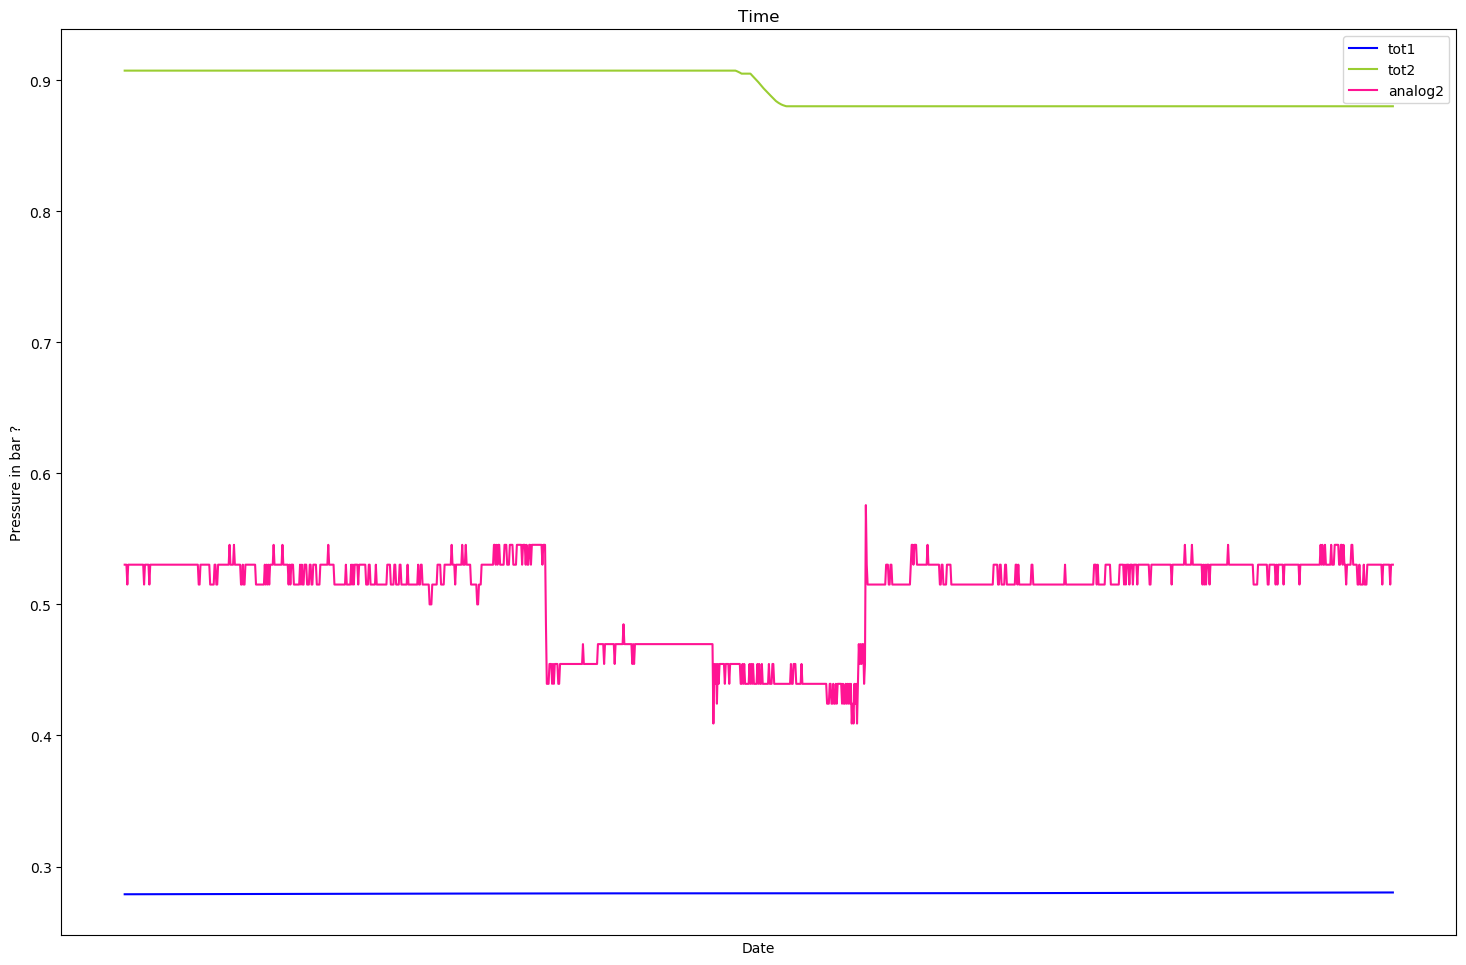

In [55]:
fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')

plt.plot(time_x, data_y[:, 0], color="blue", label="tot1")
plt.plot(time_x, data_y[:, 1], color="yellowgreen", label="tot2")
plt.plot(time_x, data_y[:, 2], color="deeppink", label="analog2")
plt.xticks([])
plt.ylabel('Pressure in bar ?')
plt.xlabel('Date')
plt.title('Time')
plt.legend()
plt.show()